In [97]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data_directory = './data'
gens_dir = [dir for dir in os.listdir(data_directory) if dir[0] != '.'\
            and os.path.isdir(data_directory + '/' + dir)]
# gen1_dir = '/gen_1_25'
# gen2_dir = '/gen_2_80'
data_dir_list = os.listdir(data_directory)
expr_spaces_begin_end = re.compile(r'(^\ +)|(\ +$)', re.M)
sep = ','
header = f"t{sep}Ug{sep}Us{sep}Pij{sep}Pg{sep}Pgt{sep}delta"

In [99]:
def convert_to_csv(filename, sep=',', format='csv', encoding='cyrillic'):
    prev_buf = ''
    with open(filename, 'r', encoding=encoding) as f1:
        with open(f1.name.replace("TXT", format), 'w') as f2:
            [f1.readline() for i in range(6)]
            print(header.expandtabs(1), file=f2)
            res = ''
            for line in f1:
                buf = line
                buf = expr_spaces_begin_end.sub('', buf)
                buf = re.sub('\ +', ',', buf)
                if prev_buf[:5] != buf[:5]:
                    res += buf
                else:
                    res = res[:-len(buf) + 1] + buf
                prev_buf = buf
            print(res, file=f2, end='')
    print(f'Converted {f1.name} -> {f2.name}')


In [100]:
# os.chdir('../')
# os.chdir('master_degree/')
os.getcwd()

'/home/poligon/master_degree'

In [101]:
gens_dir

['gen_3_25', 'gen_3_80', 'gen_1_80', 'gen_1_25', 'gen_2_80']

In [102]:
def conver_all_files_from_directory(data_directory):
    os.chdir(data_directory)
    print(data_directory)
    for directory in os.listdir('.'):
        if os.path.isfile(directory) or directory[0] == '.':
            continue
        os.chdir(directory)
        print('Converting files in', os.getcwd())
        for filename in os.listdir(os.curdir):
            if re.match(r'(.*TXT)|(.*txt)', filename):
                convert_to_csv(filename)
        os.chdir('../')
    os.chdir('../..')

In [103]:
for generator in gens_dir:
    conver_all_files_from_directory(data_directory + '/' + generator)

./data/gen_3_25
Converting files in /home/poligon/master_degree/data/gen_3_25/more_8
Converted 15.TXT -> 15.csv
Converted 6.TXT -> 6.csv
Converted 4.TXT -> 4.csv
Converted 8.TXT -> 8.csv
Converted 1.TXT -> 1.csv
Converted 7.TXT -> 7.csv
Converted 10.TXT -> 10.csv
Converted 12.TXT -> 12.csv
Converted 5.TXT -> 5.csv
Converted 13.TXT -> 13.csv
Converted 11.TXT -> 11.csv
Converted 2.TXT -> 2.csv
Converted 16.TXT -> 16.csv
Converted 9.TXT -> 9.csv
Converted 3.TXT -> 3.csv
Converted 14.TXT -> 14.csv
Converting files in /home/poligon/master_degree/data/gen_3_25/le_8
Converted 6.TXT -> 6.csv
Converted 4.TXT -> 4.csv
Converted 8.TXT -> 8.csv
Converted 1.TXT -> 1.csv
Converted 7.TXT -> 7.csv
Converted 10.TXT -> 10.csv
Converted 12.TXT -> 12.csv
Converted 5.TXT -> 5.csv
Converted 11.TXT -> 11.csv
Converted 2.TXT -> 2.csv
Converted 9.TXT -> 9.csv
Converted 3.TXT -> 3.csv
./data/gen_3_80
Converting files in /home/poligon/master_degree/data/gen_3_80/more_8
Converted 20.TXT -> 20.csv
Converted 6.TXT 

In [104]:
from sklearn.preprocessing import normalize

In [105]:
ex = pd.read_csv('./data/gen_3_80/le_8/17.csv')
columns = ex.columns[1:]
for column in ex.columns[1:]:
    ex[column] = (ex[column] - ex[column].mean()) / ex[column].std()
ex = ex.drop(['Pgt'], axis=1)

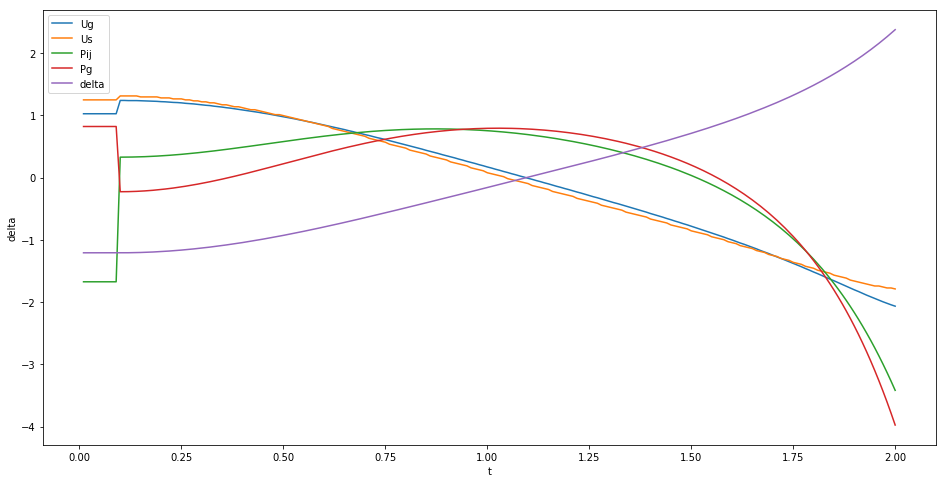

In [106]:
plt.figure(figsize=(16,8))
for feature in ex.columns[1:]:
    sns.lineplot(x='t', y=feature, data=ex, legend='full')
plt.legend(ex.columns[1:])

In [107]:
ex = pd.read_csv('./data/gen_3_80/more_8/1.csv')
columns = ex.columns[1:]
for column in ex.columns[1:]:
    ex[column] = (ex[column] - ex[column].mean()) / ex[column].std()
ex = ex.drop(['Pgt'], axis=1)

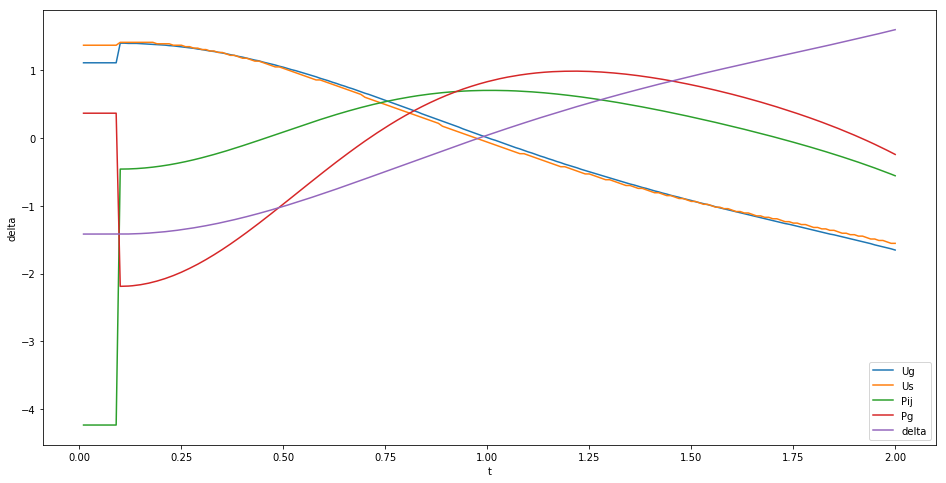

In [108]:
plt.figure(figsize=(16,8))
for feature in ex.columns[1:]:
    sns.lineplot(x='t', y=feature, data=ex, legend='full')
plt.legend(ex.columns[1:])